# 딥드림(DeepDream)

* 이번 장에서는 진정한 인공지능(AI)의 최전선에 있는 핵심 아이디어의 하나인 생성적 딥러닝에 대해 집중적으로 소개한다.
* 전이학습을 활용한 합성곱 신경망(CNN)으로 어떻게 생각과 이미지 패턴을 시각화하는지에 중점을 둘 것이다.

## 컴퓨터 비전의 알고리즘적 환각

* 인공 신경망을 이용한 물체 인식 시스템의 경우, 상위 레벨의 특성/레이어는 얼굴이나 물체와 같이 눈에 더 잘 띄는 특성에 해당한다. 이러한 특성을 강화하면 컴퓨터가 무엇을 봤는지 알 수 있다.
* 인셉션(Inception) 네트워크로 환각-유도 이미지에서 본 물체를 예측해 보자. 

In [1]:
%matplotlib inline

In [2]:
from keras.applications import inception_v3
from keras import backend as K
#from tensorflow.keras.applications.imagenet_utils import decode_predictions
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
K.set_learning_phase(0)

model = inception_v3.InceptionV3(weights='imagenet',include_top=True)

Using TensorFlow backend.
/home/dyanos/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dyanos/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dyanos/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dyanos/anaconda3/lib/python3.7/site-packages/tenso

/home/dyanos/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dyanos/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dyanos/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dyanos/anaconda3/lib/python3.7/site-packages/tensorboar

In [3]:
# 각 층이 어떻게 구성되어 있는지를 보는 코드
for layer in model.layers:
    #if layer.name.startswith("activation_"):
    print (layer.name)

input_1
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
conv2d_3
batch_normalization_3
activation_3
max_pooling2d_1
conv2d_4
batch_normalization_4
activation_4
conv2d_5
batch_normalization_5
activation_5
max_pooling2d_2
conv2d_9
batch_normalization_9
activation_9
conv2d_7
conv2d_10
batch_normalization_7
batch_normalization_10
activation_7
activation_10
average_pooling2d_1
conv2d_6
conv2d_8
conv2d_11
conv2d_12
batch_normalization_6
batch_normalization_8
batch_normalization_11
batch_normalization_12
activation_6
activation_8
activation_11
activation_12
mixed0
conv2d_16
batch_normalization_16
activation_16
conv2d_14
conv2d_17
batch_normalization_14
batch_normalization_17
activation_14
activation_17
average_pooling2d_2
conv2d_13
conv2d_15
conv2d_18
conv2d_19
batch_normalization_13
batch_normalization_15
batch_normalization_18
batch_normalization_19
activation_13
activation_15
activation_18
activation_19
mixed1
conv2d_23
batch_normalization_23
activat

In [4]:
# 최종 레이어의 weight shape
np.array(model.layers[len(model.layers)-1].get_weights()[0]).shape

(2048, 1000)

In [5]:
# activation 함수가 적용되는 층들을 따로 모은다.
activation_layers = [layer.output for layer in model.layers if layer.name.startswith("activation_")]

In [6]:
activation_layers[0]

<tf.Tensor 'activation_1/Relu:0' shape=(?, 149, 149, 32) dtype=float32>

In [7]:
activation_layers[-1]

<tf.Tensor 'activation_94/Relu:0' shape=(?, 8, 8, 192) dtype=float32>

In [8]:
layer_names = [ layer.name for layer in model.layers if layer.name.startswith("activation_")]
layer_names

['activation_1',
 'activation_2',
 'activation_3',
 'activation_4',
 'activation_5',
 'activation_9',
 'activation_7',
 'activation_10',
 'activation_6',
 'activation_8',
 'activation_11',
 'activation_12',
 'activation_16',
 'activation_14',
 'activation_17',
 'activation_13',
 'activation_15',
 'activation_18',
 'activation_19',
 'activation_23',
 'activation_21',
 'activation_24',
 'activation_20',
 'activation_22',
 'activation_25',
 'activation_26',
 'activation_28',
 'activation_29',
 'activation_27',
 'activation_30',
 'activation_35',
 'activation_36',
 'activation_32',
 'activation_37',
 'activation_33',
 'activation_38',
 'activation_31',
 'activation_34',
 'activation_39',
 'activation_40',
 'activation_45',
 'activation_46',
 'activation_42',
 'activation_47',
 'activation_43',
 'activation_48',
 'activation_41',
 'activation_44',
 'activation_49',
 'activation_50',
 'activation_55',
 'activation_56',
 'activation_52',
 'activation_57',
 'activation_53',
 'activation_58',
 

* 아래 코드에서 사용할 사전 훈련된 인셉션 네트워크 모델은 이미지넷 데이터를 이용하여 훈련했다.
* 사전 훈련된 인셉션 네트워크 모델에서 사용한 총 1,000개의 이미지넷 클래스 목록 또는 신셋(synset)은 http://image-net.org/challenges/LSVRC/2017/browse-synsets에서 참고할 수 있다.
* 책에서 언급한 이미지를 별도로 구하기 어려워서는 위에 언급한 이미지넷 링크에서 임의로 하나의 이미지를 뽑아서 저장한 파일을 사용할 것이다.

In [9]:
from keras.models import Model
activation_model = Model(inputs=model.input, outputs=activation_layers)

In [10]:
# 이미지를 읽어서 numpy 배열로 변환한다.
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    img = image.img_to_array(img)
    #convert single image to a batch with 1 image
    img = np.expand_dims(img, axis=0)    
    img = inception_v3.preprocess_input(img)
    return img

base_image_path = 'labrador.jpg'
# Load the image into a Numpy array
img = preprocess_image(base_image_path)
preds = model.predict(img)
for n, label, prob in decode_predictions(preds)[0]:
    print (label, prob)

golden_retriever 0.496629
Labrador_retriever 0.33014655
tennis_ball 0.0038336494
clumber 0.003674786
bloodhound 0.0030253548


* 아마도 예측을 하기 전에 곤충/조류의 날개를 탐지하는 필터가 색상 관련 필터와 함께 활성화됐을 것이다.

In [11]:
activations = activation_model.predict(img)

In [12]:
print(len(activation_layers))
activations[93].shape

94


(1, 8, 8, 192)

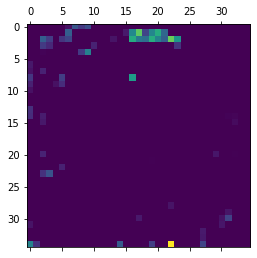

In [13]:
import matplotlib.pyplot as plt
plt.matshow(activations[7][0, :, :, 0], cmap='viridis')
plt.show()

In [14]:
print("Number of Layers", len(activations))

Number of Layers 94


In [15]:
layer_names[46]

'activation_41'

(192, 128)


/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


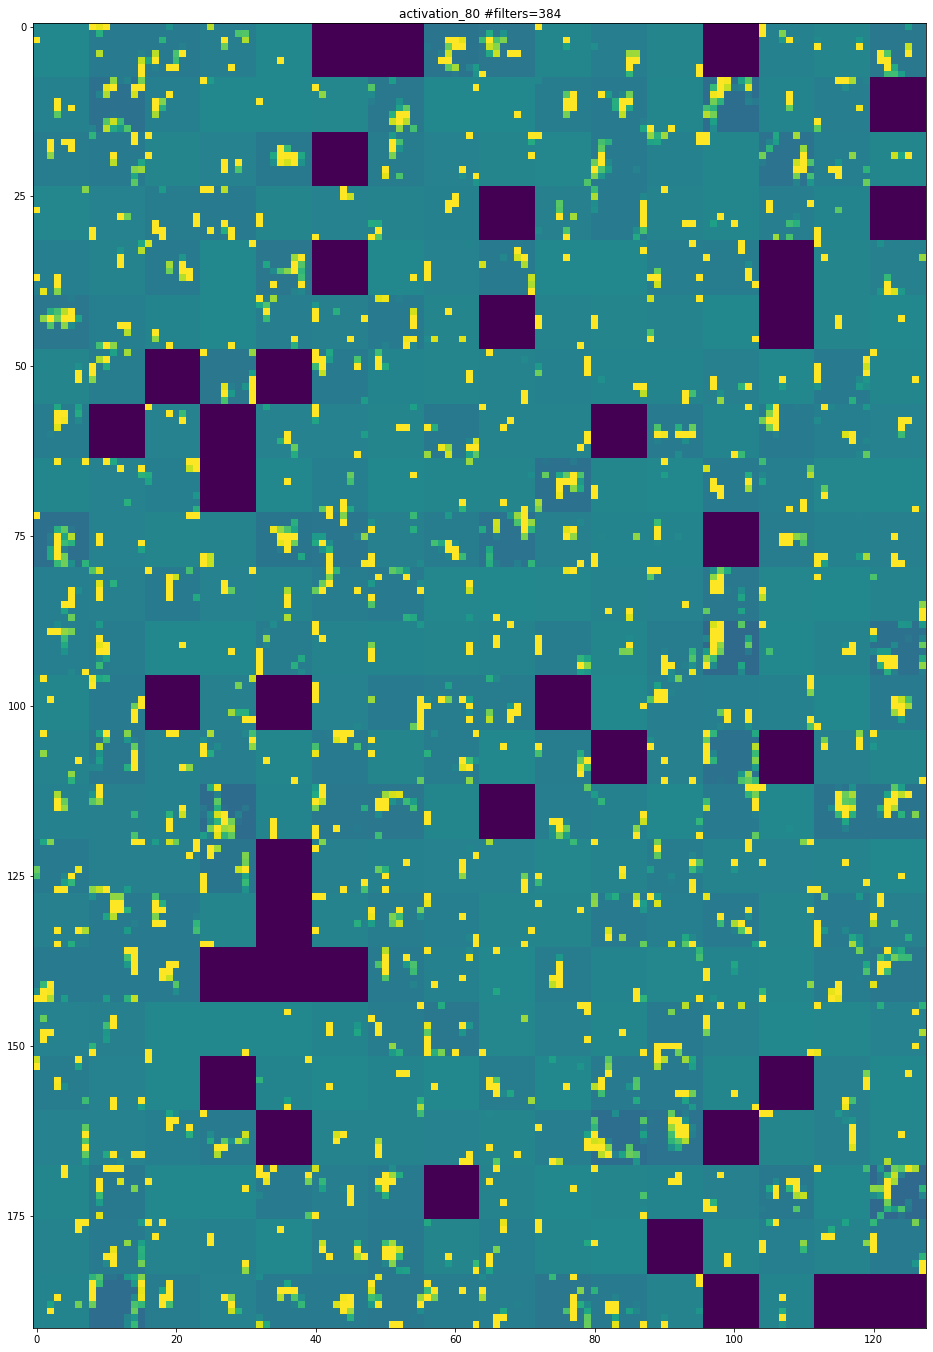

In [16]:
images_per_row = 16
idx = 80
# idx에서 지정한 층의 특성맵(feature map)을 그려본다. 
# 각 층이 가진 shape은 (1, size1, size2, n_features)와 같은 정보를 가지고 있다.
for layer_activation in activations[idx:idx+1]:
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size1, size2, n_features)
    r = layer_activation.shape[1]
    c = layer_activation.shape[2]
    
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((r * n_cols, images_per_row * c))
    print(display_grid.shape)
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * r : (col + 1) * r,
            row * c : (row + 1) * c] = channel_image
    # Display the grid : 해당 층의 모든 정보를 한꺼번에 보기 위해서 grid로 표시한다.
    scale = 1. / r
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_names[idx]+" #filters="+str(n_features))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


(588, 1176)


/home/dyanos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


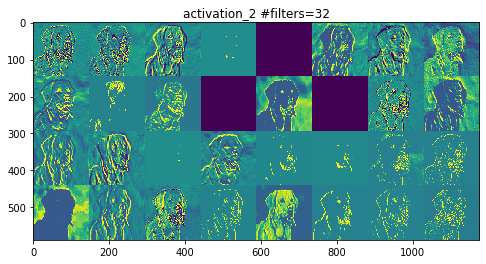

In [17]:
images_per_row = 8
idx = 1
for layer_activation in activations[idx:idx+1]:
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size1, size2, n_features)
    r = layer_activation.shape[1]
    c = layer_activation.shape[2]
    
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((r * n_cols, images_per_row * c))
    print(display_grid.shape)
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * r : (col + 1) * r,
            row * c : (row + 1) * c] = channel_image
    # Display the grid : 해당 층의 모든 정보를 한꺼번에 보기 위해서 grid로 표시한다.
    scale = 1. / r
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_names[idx]+" #filters="+str(n_features))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


## 경사 상승으로 CNN 시각화

각 활성층에는 많은 특성 지도가 있다. 다음 코드는 마지막 활성층에서 단일 특성 지도를 추출할 수 있는지 없는지를 알려준다. 이 활성값이 실제로 여기서 최적화하고자 하는 손실 값이다.

In [18]:
layer_name = 'activation_94'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

이 손실 함수에 대해 입력 이미지의 기울기를 계산하려면 다음의 케라스 백엔드 기울기 함수를 사용한다.

In [19]:
grads = K.gradients(loss, model.input)[0]
# 0으로 나누는 실수를 피하기 위해 나누기 전에 1e-5를 더한다.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [20]:
iterate = K.function([model.input], [loss, grads])
# 테스트 해 보자!
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [21]:
# 약간의 노이즈가 있는 회색 이미지에서 시작
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
# 40 스텝의 기울기 상승 실행
step = 1. # this is the magnitude of each gradient update
for i in range(40):
    # 손실값과 경사값 계산
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 조정
    input_img_data += grads_value * step

In [22]:
def deprocess_image(x):
    # 정규화 텐서: 중심 0., 표준편차 0.1인지 확인
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # [0, 1]로 클리핑
    x += 0.5
    x = np.clip(x, 0, 1)
    # RGB 배열로 변환
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [23]:
def generate_pattern(layer_name, filter_index, size=150):
    # 고려한 층의 n번째 필터의 활성화를 최대화하는 손실 함수를 만든다.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # 이 손실에 대해 입력 영상의 그래디언트를 계산
    grads = K.gradients(loss, model.input)[0]
    # 정규화 트릭: 기울기 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # 이 함수로 주어진 그림에 손실과 기울기를 반환한다.
    iterate = K.function([model.input], [loss, grads])
    # 약간의 노이즈가 있는 회색 이미지에서 시작
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    # 최적점 찾기 과정(기울기 상승)을 대략 80번 정도 수행
    step = 2.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        img = input_img_data[0]
    return deprocess_image(img)

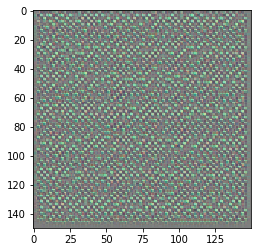

In [24]:
plt.imshow(generate_pattern('activation_2', 1))

In [25]:
idx = 0
layer_name = layer_names[idx]
images_per_row = 8
size = 64
margin = 5

n_features = activation_layers[idx].shape[-1]
n_cols = n_features // images_per_row

In [26]:
layer_name

'activation_1'

In [27]:
n_features, n_cols

(Dimension(32), Dimension(4))

In [28]:

# 검은색으로 채워진 캔버스를 만든다.
results = np.zeros((images_per_row * size + 7 * margin, images_per_row * size + 7 * margin, 3))
for i in range(n_cols): # iterate over the rows of our results grid
    for j in range(images_per_row): # iterate over the columns of our results grid
        # Generate the pattern for filter `i + (j * 8)` in `layer_name`
        filter_img = generate_pattern(layer_name, (i * images_per_row) +j, size=size)
        # Put the result in the square `(i, j)` of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img


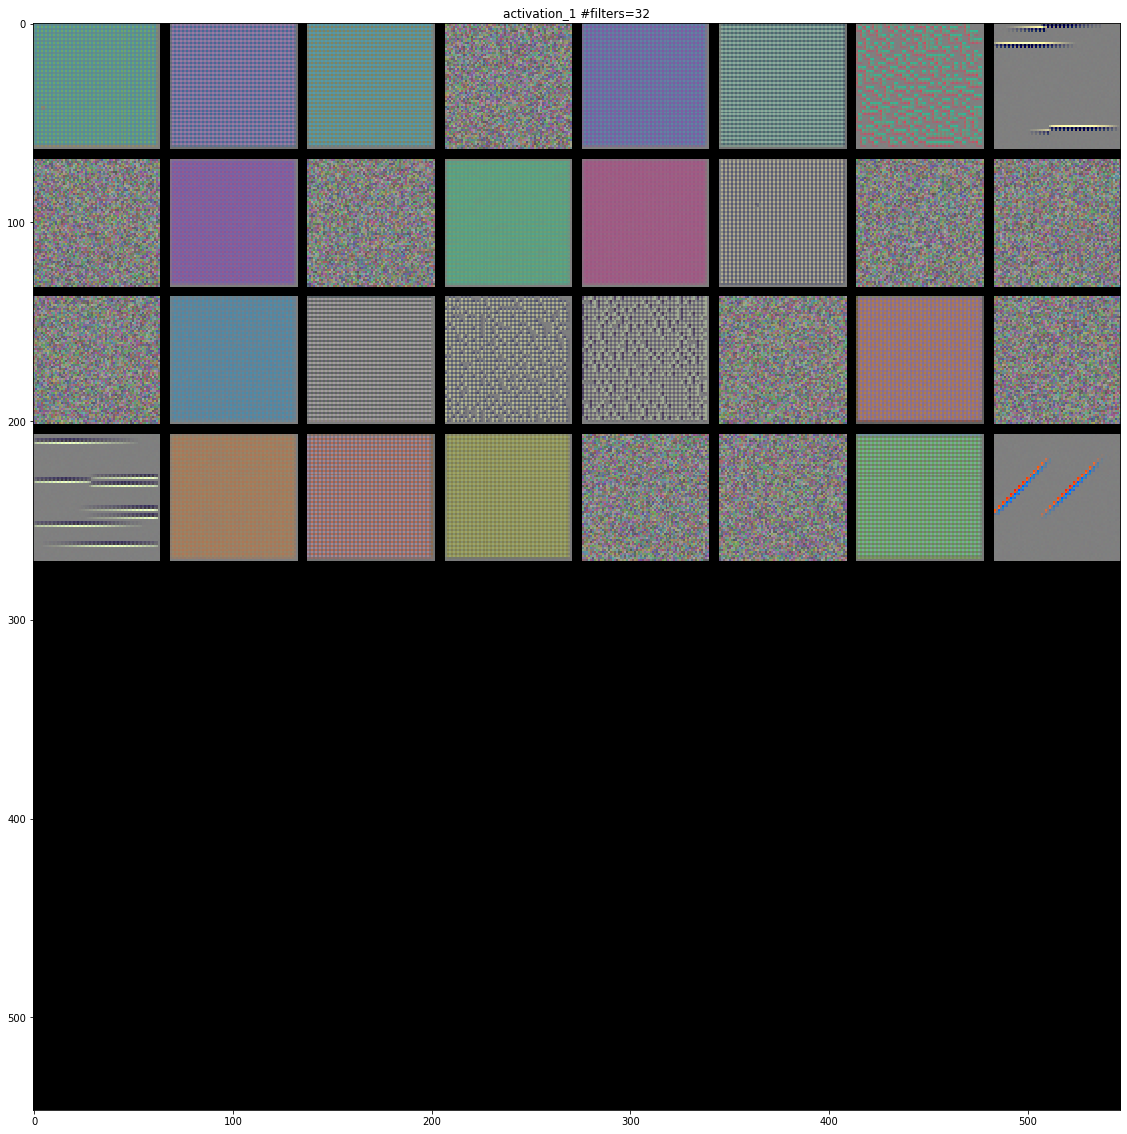

In [29]:
# Display the results grid
plt.figure(figsize=(20, 20))
plt.title(layer_names[idx]+" #filters="+str(n_features))
plt.imshow(results.astype('uint8'))
plt.show()

## 딥드림(Deep Dream)


딥드림 알고리즘은 다음과 같은 몇 가지 차이점을 제외하고 경사 상승법을 이용한 합성곱망(convNet)의 필터 시각화 기법과 거의 동일하다.

* 딥드림에서는 전체 층의 활성화가 최대가 되지만, 시각화에서는 특정 필터만 최대가 되므로 많은 특성 지도의 시각화가 혼합된다.


* 무작위 노이즈 입력이 아니라 소스 이미지에서부터 시작한다. 그러므로 최종 시각화는 소스의 시각적 패턴을 수정하고 다소 예술적인 방식으로 이미지의 요소를 왜곡한다.


* 입력 이미지는 다른 스케일(옥타브라고 한다)에서 처리되는데, 이것이 시각화의 품질을 향상시킨다.

In [30]:
layer_name = 'activation_41'
activation = model.get_layer(layer_name).output

# 손실에 비경계 픽셀만 연결시킴으로써 경계에서의 가공을 피할 수 있다.
scaling = K.prod(K.cast(K.shape(activation), 'float32'))
loss = K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

# 생성한 이미지를 텐서로 보유
dream = model.input

# 손실을 고려해 꿈의 기울기 계산
grads = K.gradients(loss, dream)[0]

# 기울기 정규화
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)


iterate_grad_ac_step = K.function([dream], [loss, grads])

In [31]:
def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = iterate_grad_ac_step([x])
        print('...Loss value at', i, ':', loss_value)
        if max_loss is not None and loss_value > max_loss:
            break        
        x += step * grad_values
    return x

In [32]:
import imageio

In [33]:
import scipy

def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)


def save_img(img, fname):
    import imageio
    pil_img = deprocess_image(np.copy(img))
    # Scipy 1.3.0부터는 scipy.misc.imsave함수가 deprecated되어 있다고 함
    #scipy.misc.imsave(fname, pil_img)
    imageio.imwrite(fname, pil_img)

In [34]:
num_octave = 4 # Number of scales at which to run gradient ascent
octave_scale = 1.4 # Size ratio between scales
iterations = 20 # Number of ascent steps per scale

# If our loss gets larger than 10, 
# we will interrupt the gradient ascent process, to avoid ugly artifacts
max_loss = 20.

base_image_path = 'blue-sky.jpg'
# Load the image into a Numpy array
img = preprocess_image(base_image_path)
print(img.shape)
# We prepare a list of shape tuples
# defining the different scales at which we will run gradient ascent
original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)

# Reverse list of shapes, so that they are in increasing order
successive_shapes = successive_shapes[::-1]

# Resize the Numpy array of the image to our smallest scale
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

print(successive_shapes)

(1, 299, 299, 3)
[(108, 108), (152, 152), (213, 213), (299, 299)]


In [35]:
MAX_ITRN = 20
MAX_LOSS = 20
learning_rate = 0.01

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=MAX_ITRN,
                          step=learning_rate,
                          max_loss=MAX_LOSS)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    print('adding lost details', lost_detail.shape)
    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)
    save_img(img, fname='dream_at_scale_' + str(shape) + '.png')

save_img(img, fname='final_dream.png')


Processing image shape (108, 108)
...Loss value at 0 : 0.01969713
...Loss value at 1 : 0.04098079
...Loss value at 2 : 0.12113897
...Loss value at 3 : 0.23926418
...Loss value at 4 : 0.3153793
...Loss value at 5 : 0.37218186
...Loss value at 6 : 0.5073824
...Loss value at 7 : 0.60424864
...Loss value at 8 : 0.70451766
...Loss value at 9 : 0.8531127
...Loss value at 10 : 0.88828063
...Loss value at 11 : 1.0277164
...Loss value at 12 : 1.1142262
...Loss value at 13 : 1.1421089
...Loss value at 14 : 1.314461
...Loss value at 15 : 1.3770047
...Loss value at 16 : 1.4790839
...Loss value at 17 : 1.6427102
...Loss value at 18 : 1.6515839
...Loss value at 19 : 1.7362126
adding lost details (1, 108, 108, 3)
Processing image shape (152, 152)
...Loss value at 0 : 0.2968376
...Loss value at 1 : 0.62610245
...Loss value at 2 : 0.8647615
...Loss value at 3 : 1.1333579
...Loss value at 4 : 1.2726735
...Loss value at 5 : 1.4796917
...Loss value at 6 : 1.6332955
...Loss value at 7 : 1.8091364
...Loss v